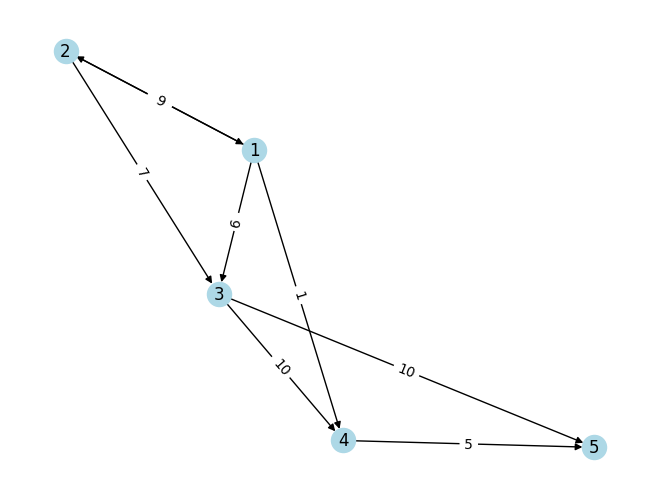

In [10]:
from classes import *
import matplotlib.pyplot as plt
import networkx as nx
import random
import utils as u

#seed = 196796533
#random.seed(seed)

nnodes = 5

N = u.generate_random_graph(nnodes)

N.show()


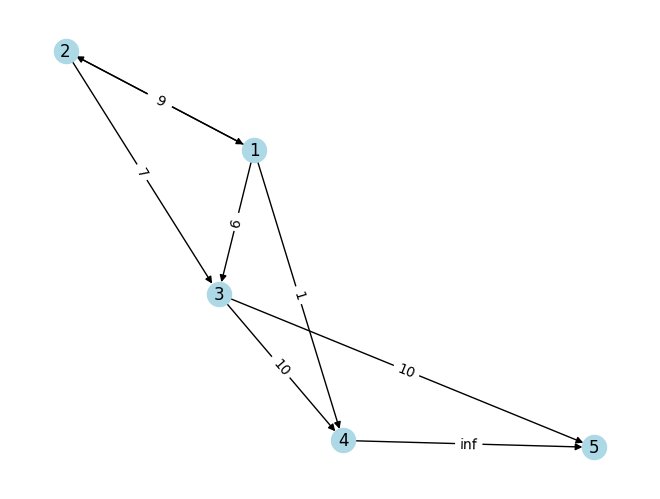

In [11]:
N.interdict()
N.show()


In [12]:
path, evader_cost = N.calculate_evader_cost(1,nnodes)
print(evader_cost)
print(path)


16.0
[1, 3, 5]
